# Предобработка данных

## Первый взгляд

In [1]:
def line():
    print('-------------------------------------------------------------------------')

In [2]:
# Первый взгляд

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/datasets/games.csv')
line()
# Приведение названий столбцов к нижнему регистру

print(data.columns)
line()
data.columns = [element.lower() for element in data.columns]

print('\n Количество дубликатов:', len(data.duplicated()) - len(data))
line()
# Рассмотрение общей информации

display(data)
line()

data.info()
line() 

#Количество пропусков в каждом столбце

print(data.isnull().sum())
line()

-------------------------------------------------------------------------
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
-------------------------------------------------------------------------

 Количество дубликатов: 0
-------------------------------------------------------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


-------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
-------------------------------------------------------------------------
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6

Комментарий: Исходя из полученной информации мы видим, что названия столбцов начинаются с большой буквы, что неудобно при дальнейшей обработке данных необходимо будет изменить регистр, в столцах year_of_release и user_score необходимо изменить тип данных также для дальнейшего удобства на int и float64 соответственно. Пропуски в столбцах year_of_release, critic_score, user_score, относятся к категориальным пропускам, при более подробном рассмотрении будет сделан вывод на какие значения их заменить, но на данном этапе можно сказать что такие переменные лучше заменить на медиану. Пропуски в столбцах name, rating относятся к категориальным пропускам, которые в последующем мы заменим на пустые значения или на более подходящие по смыслу. Пропуски в имени могут быть из за ошибки выгрузки данных или могут быть просто случайными т.к таких пропусков 2, пропуски в рейтинге могут говорить о том что данные игры не имеют ограничения , оставшиеся пропуски скорее всего появляются когда оценки критиков и пользователей ещё не выставлены, но если мы заменим их на медианное значение это не повлияет на результат и распределения

## Устранение пропусков, рассчет дополнительных данных

In [3]:
# Устранение пропусков

columns = data.columns
count_null_columns = list(data.isnull().sum())

for i in range(len(count_null_columns)):
    if count_null_columns[i] > 0:
        print('------------------------Пропуски в', columns[i], '------------------------')
        display(data[data[columns[i]].isnull()])

# Удаляем два пустых значения из столбца 'name' просто потому что это неизвестные игры, их можно не учитывать

data = data.drop(data[data['name'].isnull()].index)

# Тоже самое сделаем с строками в которых не указан год т.к гадать на кофейной гуще нет смысла, по названию заморачиваться тоже
# долго и не все даты в имени совпадают с датой выпуска -> удаляем
line()
print('\n', 'Процент пропусков с неуказанной датой {:.2%}'.format(len(data[data['year_of_release'].isnull()]) / len(data)), '\n')
line()
data = data.drop(data[data['year_of_release'].isnull()].index)

# Пропуски в critic_score и user_score заменить на 0 значит врать самому себе, такого не может быть и тем болле таких данных 
# много, если все заменим на 0 получим огромный выброс, это повлияет на дальнейшие рассчеты, надо пробовать менять на медиану
# так мы получим адекватное распределение и не испортим наши данные. С данными с tbd делаем тоже самое 2к строк, не хочется
# терять по итогу результат усреднится количеством

pd.options.mode.chained_assignment = None # Отключение предупреждения

'''                         
                                                    Без медианы
data['critic_score'].loc[data['critic_score'].isnull()] = data[pd.notnull(data['critic_score'])]['critic_score'].median()
data['user_score'].loc[data['user_score'].isnull()] = data[pd.notnull(data['critic_score'])]['critic_score'].median().astype('object')
data['user_score'].loc[data['user_score'] == 'tbd'] = data[pd.notnull(data['critic_score'])]['critic_score'].median().astype('object')
'''
# Приведем к типу int столбец year_of_release, а user_score к типу float64

data['year_of_release'] = data['year_of_release'].astype('int')
#data['user_score'] = data['user_score'].astype('float64')

# Пропуски в столбце rating относятся к пропускам в качественных переменных заменим их на Empty, возможно рейтинг
# не присвоили ну или игра вообще для 0+ или -100+

data['rating'] = data['rating'].fillna(value = 'Empty')


# Рассчитаем суммарные продажи для каждой игры

data['revenue'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

display(data)

#data.info() - по неизвестным мне причинам у меня от этой строки выводит ошибку

------------------------Пропуски в name ------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


------------------------Пропуски в year_of_release ------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


------------------------Пропуски в genre ------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


------------------------Пропуски в critic_score ------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


------------------------Пропуски в user_score ------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


------------------------Пропуски в rating ------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


-------------------------------------------------------------------------

 Процент пропусков с неуказанной датой 1.61% 

-------------------------------------------------------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Empty,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Empty,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Empty,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Empty,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Empty,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Empty,0.01


Комментарий: Удаление значений с пропусками в имени не сильно повлияют на результат исследования, поэтому мы их с чистой совестью просто удаляем, также поступаем с пропусками в не выставленной дате потму что процент таких данных составляет 1.6%, остальные пропуски оставим NaN чтобы не исказить решение задачи. Пропуски в rating заменим на Empty, чтобы понимать что рейтинг отсутствует. Приводим данные к нужным типам и получаем готовый набор для дальнейшего исследования

# Исследовательский анализ данных

## Построение графика зависимости количества игр от года выпуска

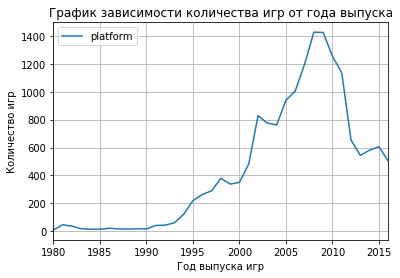

In [4]:
# Построение графика зависимости количества игр от года выпуска

count_year = data.pivot_table(index = 'year_of_release', values = 'platform', aggfunc = 'count')
count_year.plot(grid = True)

plt.title("График зависимости количества игр от года выпуска")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество игр")
plt.show()

Комментарий: Полученный график говорит нам о том что большинство игр стали выпускать начиная с 2000 года, поэтому предварительно говорим о том что мы будем проводим исследование начиная с 2000 года из за резкого скачка полученного на графике

## Построение распределения продаж по платформам 

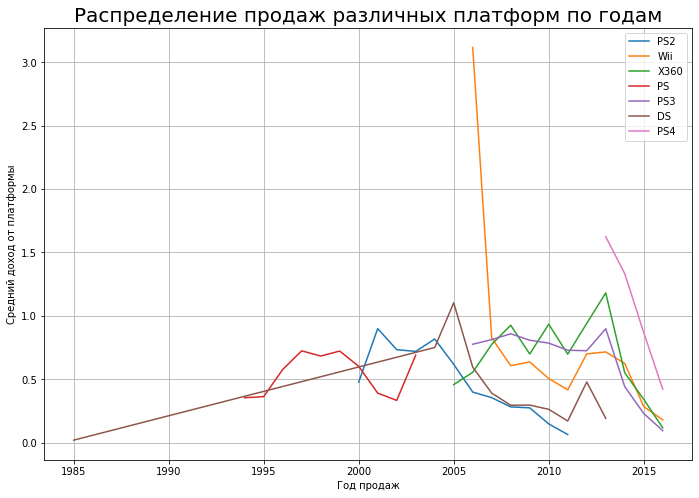

In [6]:
# Построение распределения продаж по платформам

sum_revenue_platform = data.pivot_table(index = ['platform', 'year_of_release'], values = 'revenue', aggfunc = 'sum').sort_values(by = 'revenue', ascending = False)
sum_revenue_platform = sum_revenue_platform.loc[sum_revenue_platform['revenue'] > 100]
sum_revenue_platform = sum_revenue_platform.reset_index()
unique_platform = sum_revenue_platform['platform'].unique()


# Построение графиков

fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.grid()

ax.set_xlabel('Год продаж')
ax.set_ylabel('Средний доход от платформы')

plt.title('Распределение продаж различных платформ по годам', fontsize=20)

pivot_top_platform = data.pivot_table(index = ['platform','year_of_release'], values = 'revenue', aggfunc = 'mean').reset_index()

for i in range(len(unique_platform)):
    local_data = pivot_top_platform.loc[pivot_top_platform['platform'] == unique_platform[i]]
    plt.plot(local_data['year_of_release'], local_data['revenue'], label = unique_platform[i])

    
ax.legend()
plt.show()

Комментарий: Исходя из представленного графика, мы видим что в среднем платформы живут около четырех лет

## Лидеры продаж

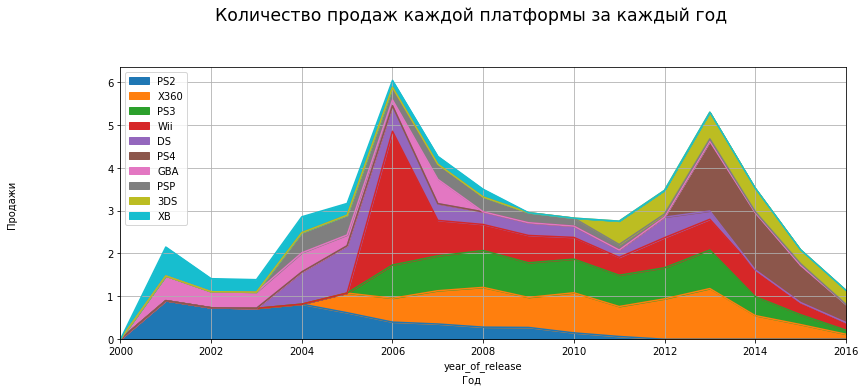

In [7]:
actual_data_global = data.loc[data['year_of_release'] > 2000]

actual_data = data.loc[data['year_of_release'] > 2000]
actual_data_revenue = actual_data.pivot_table(index = 'platform', values = 'revenue', aggfunc = 'sum').sort_values(by = 'revenue', ascending = False)
actual_data_revenue = actual_data_revenue.head(10).reset_index()

actual_data_index = list(actual_data_revenue['platform'])


table_merge = pd.DataFrame(index = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]).reset_index()
table_merge.columns = ['year_of_release']


for element in actual_data_index:
    
    local_data = data.loc[(data['platform'] == element) & (data['year_of_release'] > 2000)].sort_values(by = 'year_of_release')
    local_data = local_data.pivot_table(index = 'year_of_release', values = 'revenue', aggfunc = 'mean').reset_index()
    table_merge = table_merge.merge(local_data, on = 'year_of_release', how = 'outer')

    
actual_data_index.insert(0, 'year_of_release')
table_merge.columns = actual_data_index
table_merge = table_merge.fillna(value = 0).set_index('year_of_release')

fig, axes = plt.subplots(sharex=True, sharey=True)

table_merge.plot(kind = 'area', grid = True, figsize = (13, 5), ax=axes)

plt.suptitle('Количество продаж каждой платформы за каждый год', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.004, 'Год', ha='center')
fig.text(0.004, 0.5, 'Продажи', va='center', rotation='vertical')

plt.show()



Комментарий: Данный график отражает продолжительность продаж игр на разных платформах, также объемы продаж (толщина линии за каждый год) и текущее состояние продаж а также их активность. Исходя из данного графика делаем вывод, что платформы PS2, DS, GBA, PSP, XB, не являются популярными начиная с 2009 года, и ихпродажи либо падают либо находятся в 0, а платформы X360, PS3, Wii, 3DS, PS4 находятся на плаву, что характерно относительно стабильным доходом

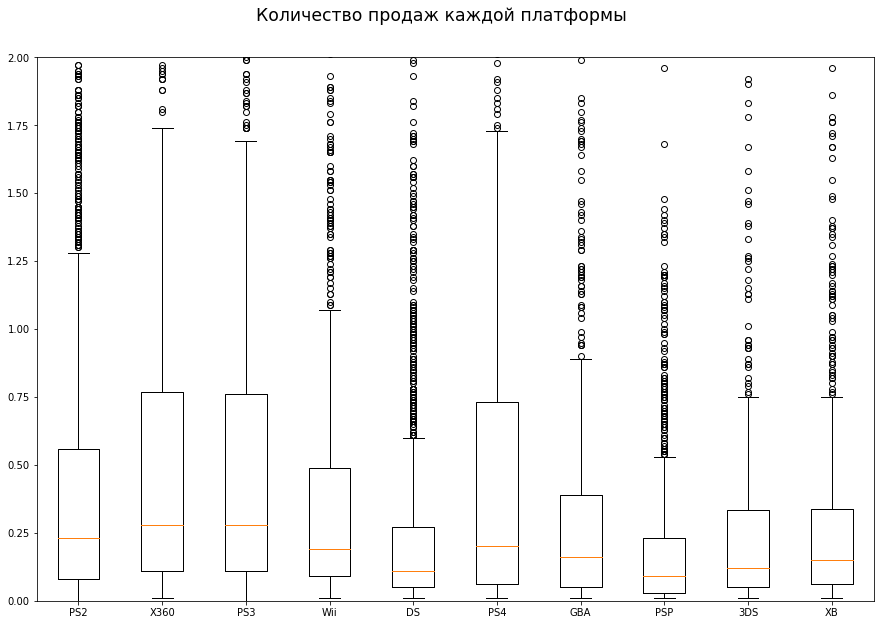

In [8]:
dict_boxplot_data = {} 

for element in actual_data_index[1:]:
    dict_boxplot_data.update({element:actual_data_global.loc[(actual_data_global['platform'] == element)]['revenue']})
    
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) # Отключение предупреждения


fig, ax = plt.subplots(figsize = (15, 10))
plt.suptitle('Количество продаж каждой платформы', x=0.5, y=0.95, ha='center', fontsize='xx-large')
plt.ylim(0,2)
ax.boxplot(dict_boxplot_data.values())
ax.set_xticklabels(dict_boxplot_data.keys())
plt.show()

Комментарий: Данныйе ящиков с усами могут нам сказать не только о количестве выбросов но и о стабильности продаж, а также являются более детальным рассмотрением предыдущих графиков, как видно мединаны платформ X360, PS3, PS2, PS4 относительно других находятся гораздо выше, а также верхние пределы являются топ 4 следовательно можно сказать, что самые выгодные продажи у них, но если рассуждать более глобально то PS4 вытеснит своих предшественников и тогда мы выделяем две самые рентабельные платформы по продажам, это PS4 и X360

## Влияние отзывов

Корреляция между пользовательскими отзывами и продажами на платформе PS2 0.17323853086163116


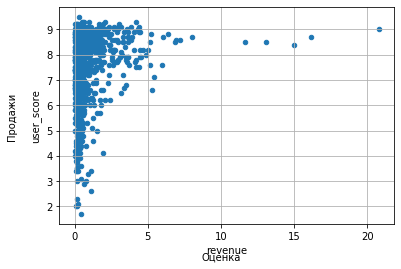

Корреляция между пользовательскими отзывами и продажами на платформе X360 0.11418661214018044


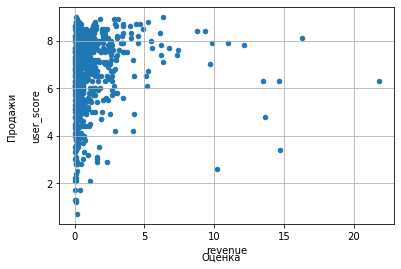

Корреляция между пользовательскими отзывами и продажами на платформе PS3 0.12841562938563028


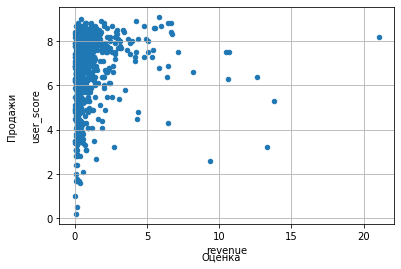

Корреляция между пользовательскими отзывами и продажами на платформе Wii 0.11283121360773772


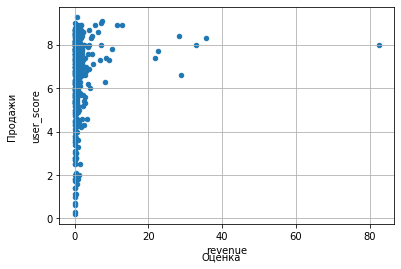

Корреляция между пользовательскими отзывами и продажами на платформе DS 0.13087600975844202


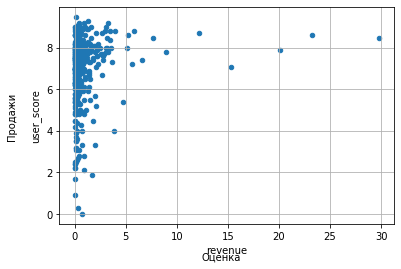

Корреляция между пользовательскими отзывами и продажами на платформе PS4 -0.031957110204556424


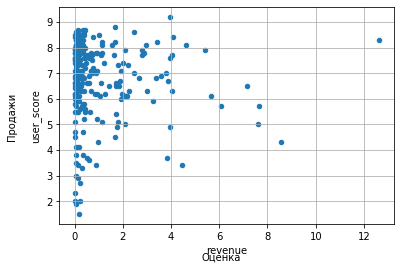

Корреляция между пользовательскими отзывами и продажами на платформе GBA 0.1061493505058516


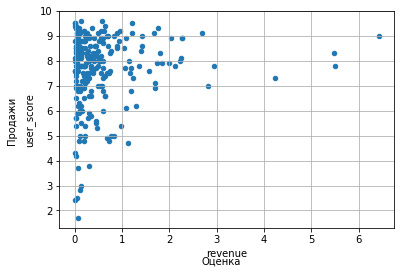

Корреляция между пользовательскими отзывами и продажами на платформе PSP 0.22089026723044386


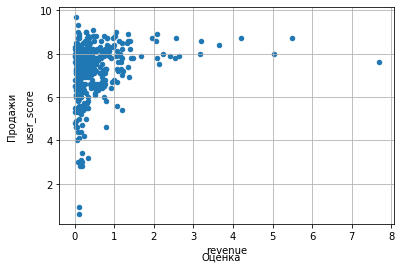

Корреляция между пользовательскими отзывами и продажами на платформе 3DS 0.22207843643390882


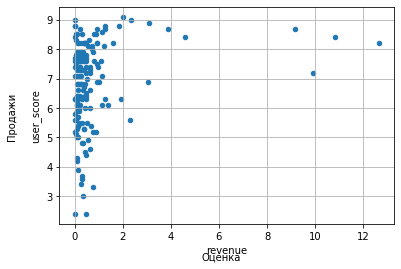

Корреляция между пользовательскими отзывами и продажами на платформе XB 0.1739064965711804


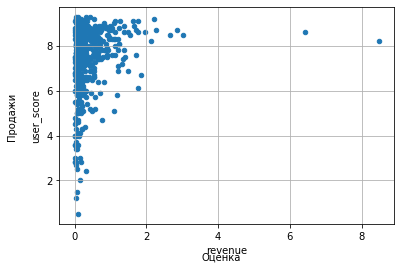

Корреляция между отзывами критиков и продажами на платформе PS2 0.3929255725800446


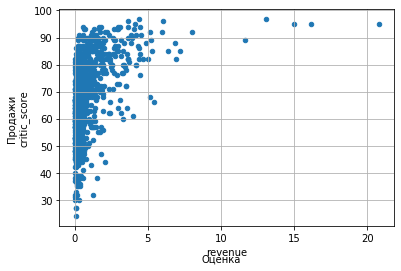

Корреляция между отзывами критиков и продажами на платформе X360 0.39286589254006965


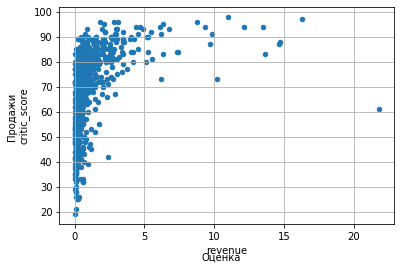

Корреляция между отзывами критиков и продажами на платформе PS3 0.4327589578997135


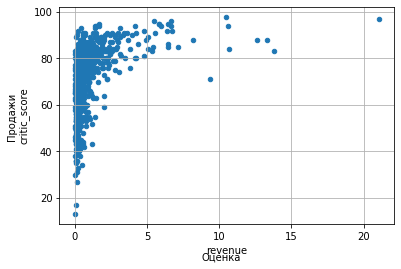

Корреляция между отзывами критиков и продажами на платформе Wii 0.1779072857759491


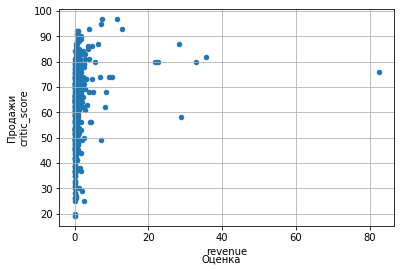

Корреляция между отзывами критиков и продажами на платформе DS 0.23754579854113442


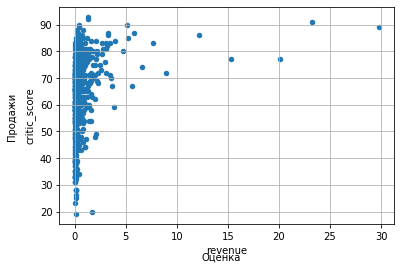

Корреляция между отзывами критиков и продажами на платформе PS4 0.40656790206178095


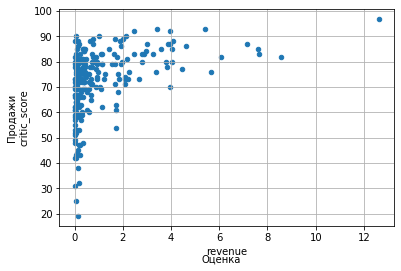

Корреляция между отзывами критиков и продажами на платформе GBA 0.24210693503333325


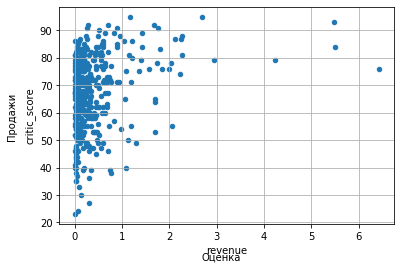

Корреляция между отзывами критиков и продажами на платформе PSP 0.31752451005134863


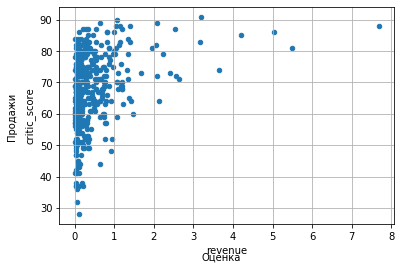

Корреляция между отзывами критиков и продажами на платформе 3DS 0.3487397305984834


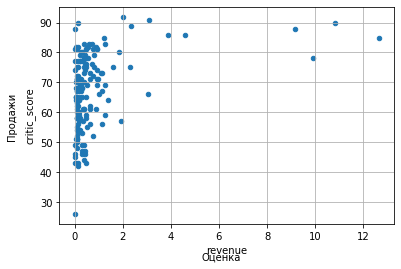

Корреляция между отзывами критиков и продажами на платформе XB 0.3836431702248976


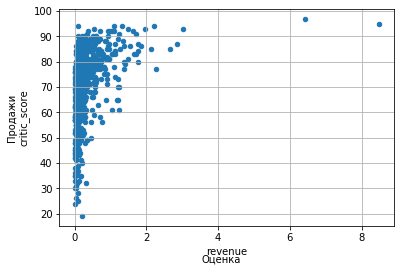

In [9]:
for element in actual_data_index[1:]:
    
    local_data = actual_data_global.loc[(actual_data_global['platform'] == element)]
    fig, axes = plt.subplots(sharex=True, sharey=True)
    
    local_user_score = local_data[local_data['user_score'].notnull()].loc[local_data['user_score'] != 'tbd']
    local_user_score['user_score'] = local_user_score['user_score'].astype('float64')
    
    print('Корреляция между пользовательскими отзывами и продажами на платформе', element, local_user_score['user_score'].corr(local_user_score['revenue']))
    
    fig.text(0.5, 0.001, 'Оценка', ha='center')
    fig.text(0.004, 0.5, 'Продажи', va='center', rotation='vertical')
    
    local_user_score.plot(x='revenue', y='user_score', kind='scatter', grid = True, ax=axes)
    plt.show()
    
    
for element in actual_data_index[1:]:
    
    local_data = actual_data_global.loc[(actual_data_global['platform'] == element)]
    fig, axes = plt.subplots(sharex=True, sharey=True)
    
    local_critic_score = local_data[local_data['critic_score'].notnull()]
    
    fig.text(0.5, 0.001, 'Оценка', ha='center')
    fig.text(0.004, 0.5, 'Продажи', va='center', rotation='vertical')
    
    print('Корреляция между отзывами критиков и продажами на платформе', element, local_critic_score['critic_score'].corr(local_critic_score['revenue']))
    local_critic_score.plot(x='revenue', y='critic_score', kind='scatter', grid = True, ax=axes)
    plt.show()

Комментарий: Вывод из представленных графиков очевиден и подтвержден значением корреляции, а вывод таков, что на продажи любой платформы независимо от того популярная она или нет в большей степени влияют оценки критиков, чем лучше оценка тем лучше продажи

## Самые прибыльные жанры 

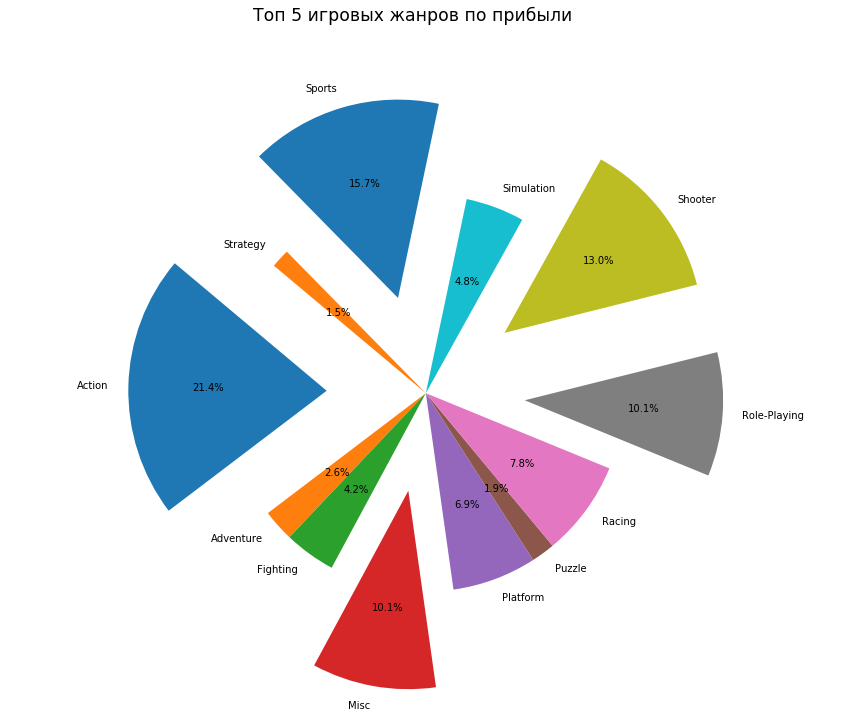

In [10]:
pivot_genre = actual_data_global.pivot_table(index = 'genre', values = 'revenue', aggfunc = 'sum')

labels = list(pivot_genre.index)
sizes = list(pivot_genre['revenue'])

explode = (0.5, 0, 0, 0.5, 0, 0, 0, 0.5, 0.5, 0, 0.5, 0)

fig, ax = plt.subplots(figsize = (15, 12))
plt.suptitle('Топ 5 игровых жанров по прибыли', x=0.5, y=0.95, ha='center', fontsize='xx-large')

ax.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

Комментарий: Самыми популярными жанрами являются жанры: Action, Misc, Role-Playing, Shooter, Sports. Так получается потому что большинство игр выпускаются именно для этих платформ остальные жанры пользуются в большинстве случаев на мобильных платформах 

,mean,sum
genre,,
Action,0.491657,1492.18
Adventure,0.153463,180.78
Fighting,0.477316,291.64
Misc,0.445656,702.80
Platform,0.687313,478.37
Puzzle,0.287730,134.37
Racing,0.545423,541.06
Role-Playing,0.552455,702.17
Shooter,0.816835,905.87


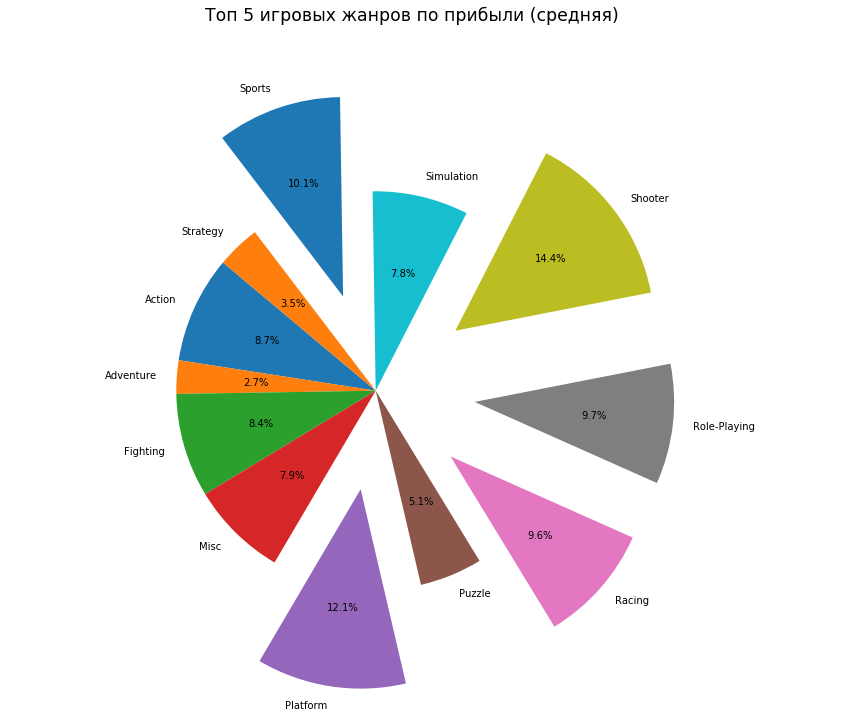

In [11]:
mean_genre = actual_data_global.pivot_table(index = 'genre', values = 'revenue', aggfunc = ['mean', 'sum'])

mean_genre.columns = ['mean', 'sum']
display(mean_genre)

labels = list(mean_genre.index)
sizes = list(mean_genre['mean'])

explode = (0, 0, 0, 0, 0.5, 0, 0.5, 0.5, 0.5, 0, 0.5, 0)

fig, ax = plt.subplots(figsize = (15, 12))
plt.suptitle('Топ 5 игровых жанров по прибыли (средняя)', x=0.5, y=0.95, ha='center', fontsize='xx-large')

ax.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

Комментарий: Если смотреть по средним продажам то мы получаем совершенно другую картину, в лидеры выбиваются жанры Sports, Platform, Racing, Role-Playing, Shooter.

# Портрет пользователя каждого региона

In [10]:
for element in list(actual_data_global.columns)[4:7]:
    pivot_local = actual_data_global.groupby(by = 'platform').sum().sort_values(by = element, ascending = False).head(5)
    print('Лидеры продаж в',element[:2].upper(), ':', ', '.join(list(pivot_local.index)))
plt.show()

Лидеры продаж в NA : X360, PS2, Wii, PS3, DS
Лидеры продаж в EU : PS3, PS2, X360, Wii, DS
Лидеры продаж в JP : DS, PS2, 3DS, PS3, PSP


In [11]:
for element in list(actual_data_global.columns)[4:7]:
    pivot_local = actual_data_global.groupby(by = 'genre').sum().sort_values(by = element, ascending = False).head(5)
    print('Лидеры продаж в',element[:2].upper(), ':', ', '.join(list(pivot_local.index)))

Лидеры продаж в NA : Action, Sports, Shooter, Misc, Role-Playing
Лидеры продаж в EU : Action, Sports, Shooter, Misc, Racing
Лидеры продаж в JP : Role-Playing, Action, Misc, Sports, Platform


In [12]:
for element in list(actual_data_global.columns)[4:7]:
    pivot_local = actual_data_global.groupby(by = 'rating').sum().sort_values(by = element, ascending = False).head(5)
    print('Лидеры продаж в',element[:2].upper(), ':', ', '.join(list(pivot_local.index)))

Лидеры продаж в NA : E, M, T, Empty, E10+
Лидеры продаж в EU : E, M, T, Empty, E10+
Лидеры продаж в JP : Empty, E, T, M, E10+


Комментарий: Исходя из полученных данных можно сделать вывод, что мы имеем значительное отличие на японском рынке, по используемым платформам, по жанру используемых игр а также рейтингу. Делаем вывод что японский рынок больше отдает предпочтение консолям типа Nintendo и соответственно можно понять почему именно такие лидеры продаж в жанрах, соответственно и рейтинг данных игр можно предположить, что не имеет значительных ограничений (Empty)

# Проверка гипотез

## Проверка первой гипотезы

Statistics=0.963, p=0.025
Распределение не выглядит гауссовым


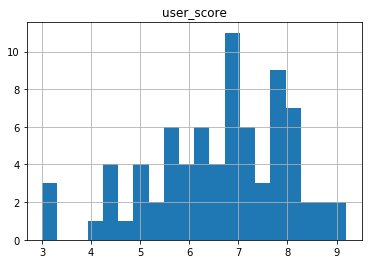

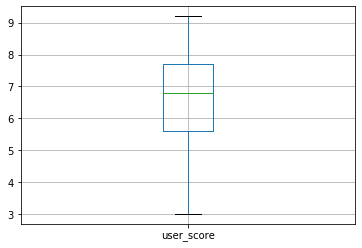

Statistics=0.925, p=0.000
Распределение не выглядит гауссовым


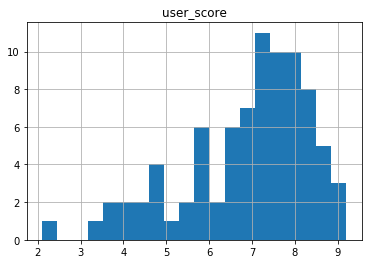

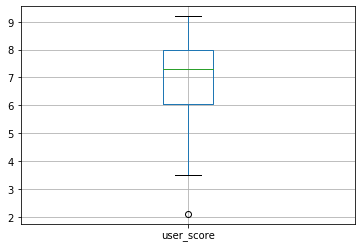

Дисперсии двух наборов данных:  1.9962185866081967 2.1928872114965885


In [33]:
from scipy.stats import shapiro
def my_shapiro(sample):
    stat, p = shapiro(sample)
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print('Распределение выглядит гауссовым')
    else:
        print('Распределение не выглядит гауссовым')
        
my_shapiro(sample_rating1['user_score'])
sample_rating1.hist('user_score', bins = 20)
plt.show()
sample_rating1.boxplot('user_score')
plt.show()
my_shapiro(sample_rating2['user_score'])
sample_rating2.hist('user_score', bins = 20)
plt.show()
sample_rating2.boxplot('user_score')
plt.show()

variance1 = np.var(sample_rating1['user_score'])
variance2 = np.var(sample_rating2['user_score'])

print('Дисперсии двух наборов данных: ', variance1, variance2) 

Комментарий: Одна ненормальность... Получается так, что для данных наборов данных не подходит тест Стьюдента, необходим тест Мана-Уитни, мы бы конечно могли попытаться привести данные к нормальному виду но не в этом случае

In [42]:
alpha = .05

results = st.mannwhitneyu(
    sample_rating1['user_score'], 
    sample_rating2['user_score'],
    )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.05664321036724256
Не получилось отвергнуть нулевую гипотезу


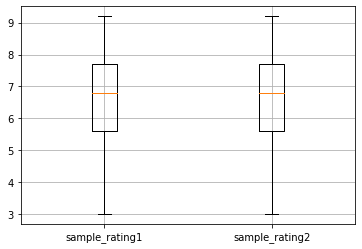

In [59]:
my_dict = {'sample_rating1':sample_rating1['user_score'], 'sample_rating2': sample_rating1['user_score']}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
plt.grid()
plt.show()

Комментарий: 

Формулируем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (равны).
Формулируем альтернативную гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC разные (не равны).

Нам необходимо подтверждение нулевой гипотезы (H0), и мы ее подтвердили

Ну и исходя из полученных ящиков мы видим что XOne немного по рейтингу опережает PC прям вот вообще десятые доли что также говорит о правильности решения.

## Проверка второй гипотезы

Statistics=0.947, p=0.017
Распределение не выглядит гауссовым


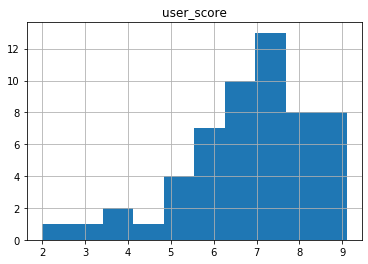

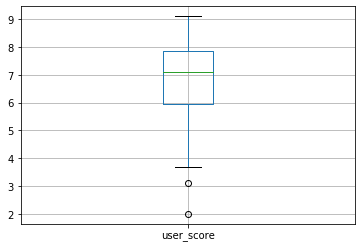

Statistics=0.918, p=0.001
Распределение не выглядит гауссовым


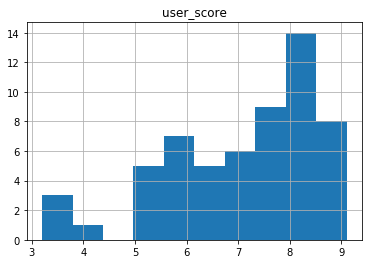

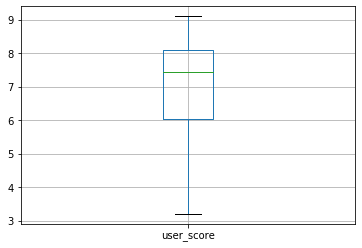

Дисперсии двух наборов данных:  2.3464991735537186 2.1254340071343636


In [46]:
from scipy.stats import shapiro
def my_shapiro(sample):
    stat, p = shapiro(sample)
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print('Распределение выглядит гауссовым')
    else:
        print('Распределение не выглядит гауссовым')
        
my_shapiro(sample_genre1['user_score'])
sample_genre1.hist('user_score', bins = 10)
plt.show()
sample_genre1.boxplot('user_score')
plt.show()
my_shapiro(sample_genre2['user_score'])
sample_genre2.hist('user_score', bins = 10)
plt.show()
sample_genre2.boxplot('user_score')
plt.show()

variance1 = np.var(sample_genre1['user_score'])
variance2 = np.var(sample_genre2['user_score'])

print('Дисперсии двух наборов данных: ', variance1, variance2) 

In [47]:
alpha = .05

results = st.mannwhitneyu(
    sample_genre1['user_score'], 
    sample_genre2['user_score'],
    )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16499458725614358
Не получилось отвергнуть нулевую гипотезу


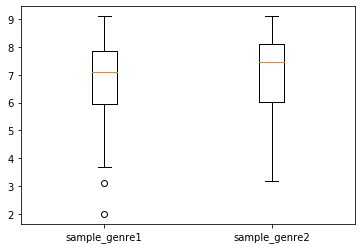

In [58]:
my_dict = {'sample_genre1' : sample_genre1['user_score'], 'sample_genre2': sample_genre2['user_score']}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
plt.show()

Подтвердилась гипотеза H0, но теперь точно и с пониманием что мы правильный метод для проверки гипотезы выбрали. + Мы можем сказать из данного boxplot, что пользовательские рейтинги у sample_genre2 -> (Sports) выше чем Action

Комментарий: 

Формулируем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковые. (равны).
Формулируем альтернативную гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные. (не равны).

Нам необходимо подтверждение альтернативной гипотезы (H1)

Исходя из проверки гипотезы, нулевая гипотеза не была отвергнута, а значит гипотеза H1 не подтвердилась, и соответственно делаем вывод о том, что средние пользовательские рейтинги жанров Action и Sports разные - не верно.

# Вывод

Общие выводы по проекту:
    
1. Большой всплеск создания игр в игровой индустрии начался с 2010 года
2. В среднем платформы появляются в течении 5 лет, а исчезают через 4 года
3. Лидерами продаж являются X360, PS3, Wii, 3DS, PS4, но самыми перспективными в будущем - PS4 и X360
4. На продажи в большей степени влияют оценки критиков нежели самих пользователей (перед выпуском платформы пользователи ведь не ставят оценки)
5. Самыми популярными жанрами являются жанры: Action, Misc, Role-Playing, Shooter, Sports
6. Японцев не интересуют так сильно топовые платформы, им нинтендо подавай
7. Мы выяснили, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Ну наверное потому что это все компания microsoft - одинаковый рынок
8. Средние пользовательские рейтинги жанров Action и Sports разные (нет). Тот, кто любит экшОн тот любит и спорт

Успешная игра, это игра для консольщиков, которую пропеарили критики обзорщики и т.д., в жанре Action или Sports, но только не для Японского рынка.